In [1]:
import pickle
import matplotlib.pyplot as plt
import itertools

In [ ]:
# import pickle

# objects_dict = {}
# for i in range(8):  # set N to the number of history files you expect
#     try:
#         with open(f"[densenet_block_output]_tobeupdated/densenet_history/history_{i}.pickle", "rb") as openfile:
#             data = pickle.load(openfile)
#             objects_dict[f"history_{i}"] = data
#     except EOFError:
#         print(f"EOFError at file {i}")
#         break
#     except Exception as e:
#         print(f"❌ Error loading history_{i}.pickle:", e)
#         break


# Reading Block Freezing Tuning Result 

In [2]:
objects_dict = {}
for i in range(1, 8):
    with (open(f"[densenet_block_output]_tobeupdated/densenet_history/history_{i}.pickle", "rb")) as openfile:
        try:
            objects_dict[f"history_{i}"] =pickle.load(openfile)
        except EOFError:
            break

2025-04-21 22:47:44.834412: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/rds/general/user/js4124/home/anaconda3/envs/ml_py/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 74 variables whereas the saved optimizer has 146 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/rds/general/user/js4124/home/anaconda3/envs/ml_py/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 210 variables whereas the saved optimizer has 418 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/rds/general/user/js4124/home/anacond

In [3]:
# Example dictionary holding the training and validation accuracy for each freezing strategy
accuracy_h = {
    i: {'train_accuracy': objects_dict[f"history_{i}"].history['accuracy'], 'val_accuracy': objects_dict[f"history_{i}"].history['val_accuracy']}  
    for i in range(1, 8)
}

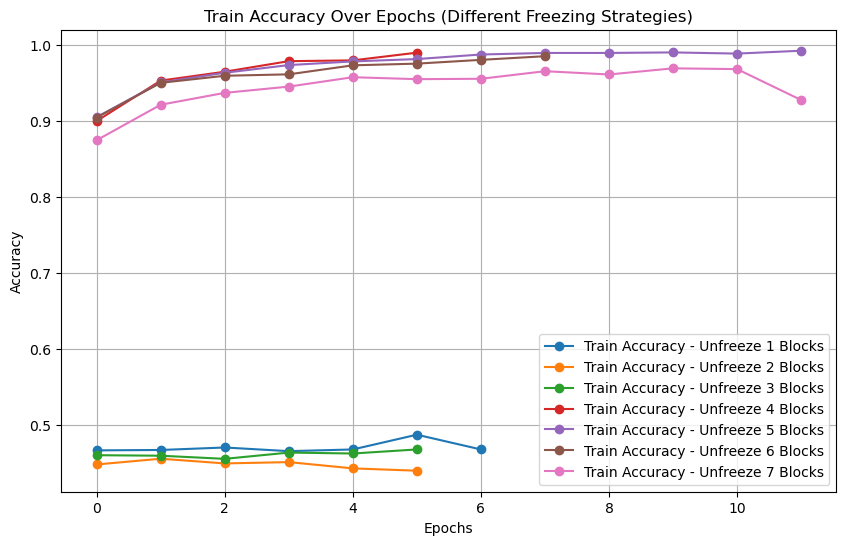

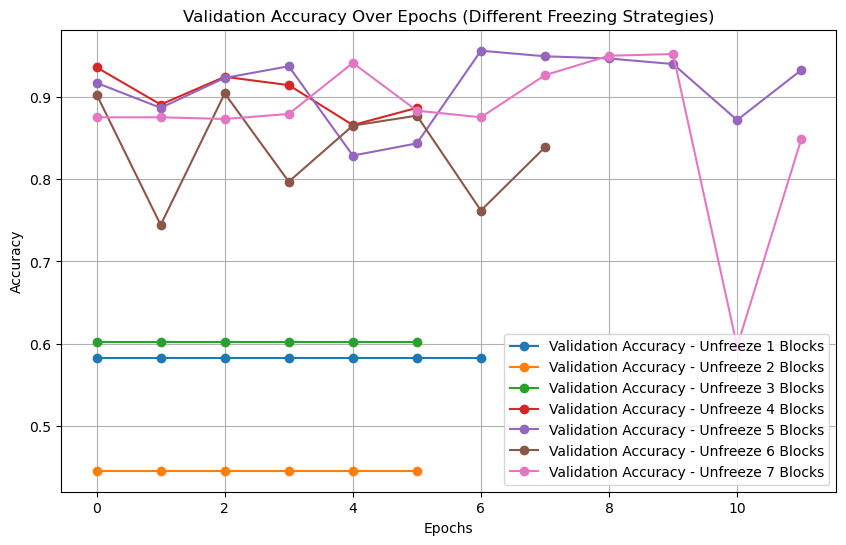

In [6]:
# Plot train accuracy for each freezing strategy
plt.figure(figsize=(10, 6))
for freezing in range(1, 8):
    plt.plot(accuracy_h[freezing]['train_accuracy'], label=f'Train Accuracy - Unfreeze {freezing} Blocks', linestyle='-', marker='o')

plt.title('Train Accuracy Over Epochs (Different Freezing Strategies)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
# Plot validation accuracy for each freezing strategy
for freezing in range(1, 8):
    plt.plot(accuracy_h[freezing]['val_accuracy'], label=f'Validation Accuracy - Unfreeze {freezing} Blocks', linestyle='-', marker='o')

# Add title and labels
plt.title('Validation Accuracy Over Epochs (Different Freezing Strategies)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)

# Reading Hyperparameter Tuning Result - Binary class

In [2]:
# Copy the hyperparameter grid from the previous code
hyperparameters = {
    'batch_size': [16,32],
    'learning_rate': [0.0001, 0.01, 0.1],
    'dropout_rate': [0.5, 0.2],
    'weight_decay': [0, 0.00001, 0.01],
}
keys, values = zip(*hyperparameters.items())
param_grid = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [4]:
objects_dict = {}
for i in range(36):
    with (open(f"densenet_hpo/history/hpo_history_{i}_binary.pickle", "rb")) as openfile:
        try:
            objects_dict[f"history_{i}"] =pickle.load(openfile)
        except EOFError:
            break


2025-04-22 10:29:54.217508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/rds/general/user/js4124/home/anaconda3/envs/ml_py/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 296 variables whereas the saved optimizer has 590 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
model_dict = {}
for i in range(36):
    with (open(f"densenet_hpo/models_pickle/hpo_model_{i}_binary.pickle", "rb")) as openfile:
        try:
            model_dict[f"model_{i}"] =pickle.load(openfile)
        except EOFError:
            break

/rds/general/user/js4124/home/anaconda3/envs/ml_py/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 296 variables whereas the saved optimizer has 590 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
# Example dictionary holding the training and validation accuracy for each freezing strategy
accuracy_h = {
    i: {'train_accuracy': objects_dict[f"history_{i}"].history['accuracy'], 'val_accuracy': objects_dict[f"history_{i}"].history['val_accuracy']}  
    for i in range(36)
}
f1_score_h = {
    i: {'train_f1_score': objects_dict[f"history_{i}"].history['f1_score'], 'val_f1_score': objects_dict[f"history_{i}"].history['val_f1_score']}  
    for i in range(36)
}
AUC_h = {
    i: {'train_AUC': objects_dict[f"history_{i}"].history['AUC'], 'val_AUC': objects_dict[f"history_{i}"].history['val_AUC']}  
    for i in range(36)
}

In [6]:
# Define a colorful palette for the top 5 configurations
color_palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Sort configurations by the maximum validation accuracy
sorted_configs = sorted(range(36), key=lambda x: max(accuracy_h[x]['val_accuracy']), reverse=True)

# Top 5 configurations
top_5_configs = sorted_configs[:5]

# Print the corresponding hyperparameter combinations for the top 5 configurations
print("Top 5 Hyperparameter Models:")
for idx in top_5_configs:
    print(f"Model for Config {idx} ({param_grid[idx]}):")
    print(f"Accuracy {max(accuracy_h[idx]['val_accuracy'])}, F1 Score {max(f1_score_h[idx]['val_f1_score'])}, AUC {max(AUC_h[idx]['val_AUC'])}")

Top 5 Hyperparameter Models:
Model for Config 19 ({'batch_size': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.5, 'weight_decay': 1e-05}):
Accuracy 0.9474039077758789, F1 Score [0.91371673 0.96217257], AUC 0.9804657697677612
Model for Config 21 ({'batch_size': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.2, 'weight_decay': 0}):
Accuracy 0.9440323710441589, F1 Score [0.9108485 0.9592137], AUC 0.9807455539703369
Model for Config 2 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.5, 'weight_decay': 0.01}):
Accuracy 0.942683756351471, F1 Score [0.90967053 0.9580246 ], AUC 0.9796494245529175
Model for Config 4 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.2, 'weight_decay': 1e-05}):
Accuracy 0.941335141658783, F1 Score [0.90300995 0.9579506 ], AUC 0.9698497653007507
Model for Config 0 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.5, 'weight_decay': 0}):
Accuracy 0.940660834312439, F1 Score [0.9013452  0.95756984], AUC 0.9757422208786011


In [13]:
print(f"Accuracy {max(accuracy_h[idx]['val_accuracy'])}")
print(f1_score_h[idx]['val_f1_score'])
print(f"AUC {max(AUC_h[idx]['val_AUC'])}")

Accuracy 0.940660834312439
[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.9013452 , 0.95756984], dtype=float32)>]
AUC 0.9757422208786011


In [ ]:


# Plot train accuracy for each hyperparameter configuration
plt.figure(figsize=(12, 8))
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['train_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['train_accuracy'], linestyle='--', color='lightgrey')

plt.title('Train Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 8))
# Plot validation accuracy for each parameter configuration
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['val_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['val_accuracy'], linestyle='--', color='lightgrey')

# Add title and labels
plt.title('Validation Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)

Top 5 Hyperparameter Models:


KeyError: 'model_2'

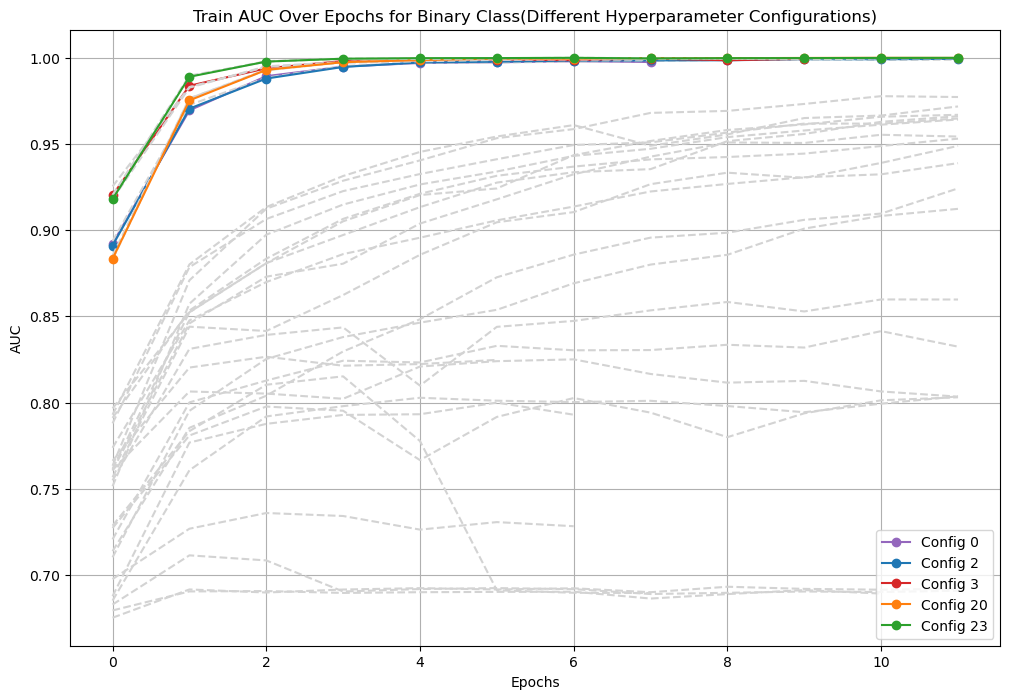

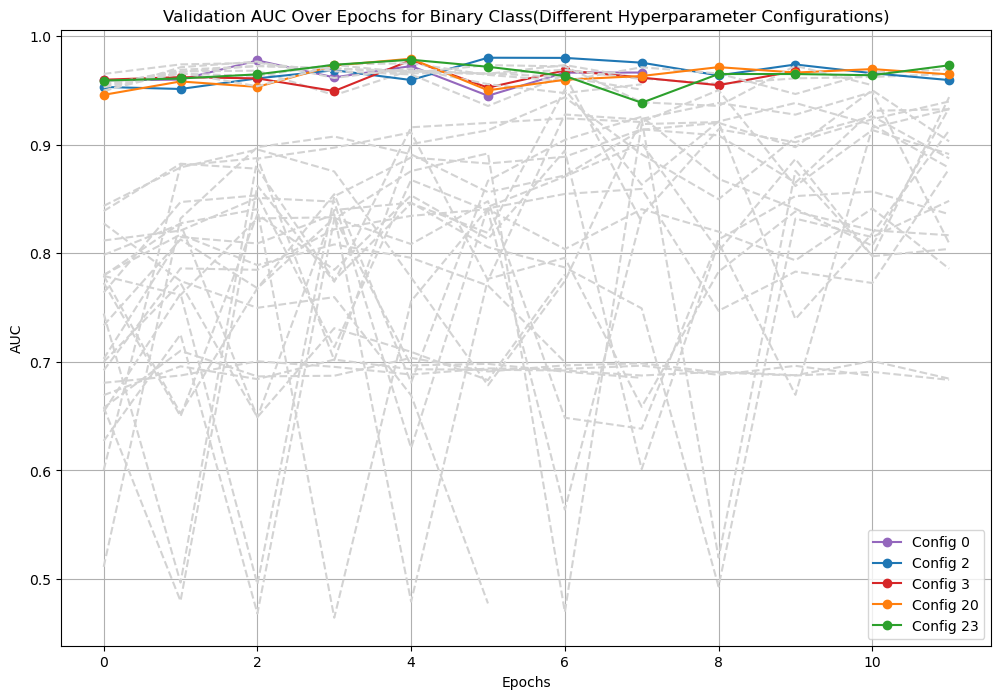

In [28]:
# Sort configurations by the maximum validation accuracy
sorted_configs = sorted(range(36), key=lambda x: max(AUC_h[x]['val_AUC']), reverse=True)

# Top 5 configurations
top_5_configs = sorted_configs[:5]

# Plot train AUC for each hyperparameter configuration
plt.figure(figsize=(12, 8))
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(AUC_h[i]['train_AUC'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(AUC_h[i]['train_AUC'], linestyle='--', color='lightgrey')

plt.title('Train AUC Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 8))
# Plot validation AUC for each parameter configuration
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(AUC_h[i]['val_AUC'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(AUC_h[i]['val_AUC'], linestyle='--', color='lightgrey')

# Add title and labels
plt.title('Validation AUC Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('AUC')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)



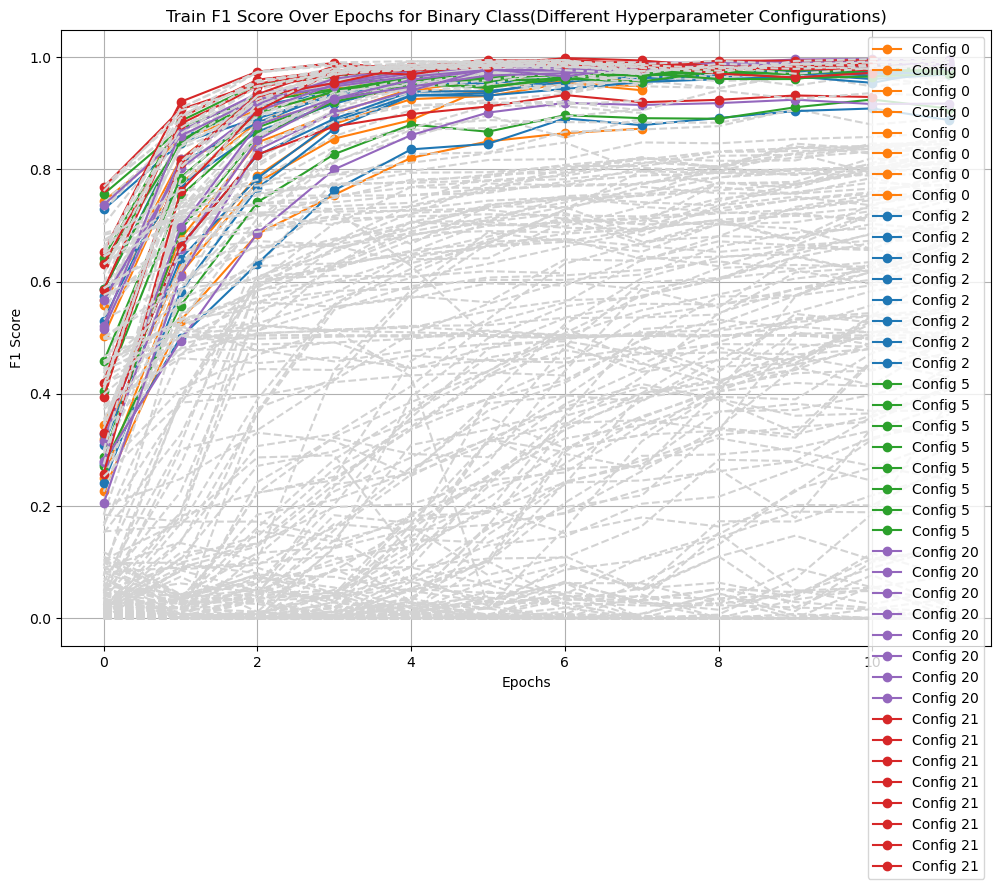

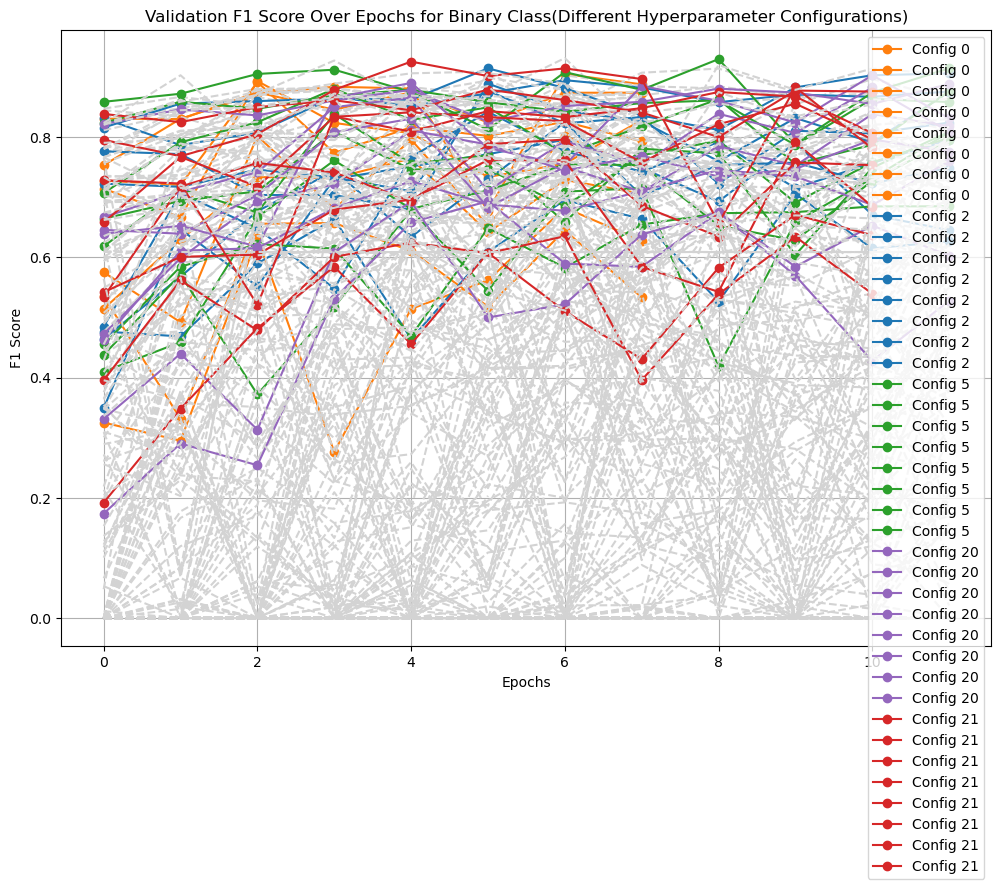

In [50]:
# Plot train F1 score for each hyperparameter configuration
plt.figure(figsize=(12, 8))
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(f1_score_h[i]['train_f1_score'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(f1_score_h[i]['train_f1_score'], linestyle='--', color='lightgrey')

plt.title('Train F1 Score Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 8))
# Plot validation F1 score for each parameter configuration
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(f1_score_h[i]['val_f1_score'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(f1_score_h[i]['val_f1_score'], linestyle='--', color='lightgrey')

# Add title and labels
plt.title('Validation F1 Score Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)

In [71]:
print(type(model_dict))
print(accuracy_h[1]["val_accuracy"])


<class 'dict'>
[0.7161159515380859, 0.7585974335670471, 0.7875927090644836, 0.7316250801086426, 0.7970330119132996, 0.7936614751815796, 0.8199595212936401, 0.8024275302886963, 0.7977073788642883, 0.8004046082496643, 0.7990559935569763, 0.7963587045669556]


# Reading Hyperparameter Tuning Result - Multiclass class

In [15]:
# Copy the hyperparameter grid from the previous code
hyperparameters = {
    'batch_size': [16,32],
    'learning_rate': [0.0001, 0.01, 0.1],
    'dropout_rate': [0.5, 0.2],
    'weight_decay': [0, 0.00001, 0.01],
}
keys, values = zip(*hyperparameters.items())
param_grid = [dict(zip(keys, v)) for v in itertools.product(*values)]

In [16]:
objects_dict = {}
for i in range(36):
    with (open(f"densenet_hpo/history/hpo_history_{i}_multi.pickle", "rb")) as openfile:
        try:
            objects_dict[f"history_{i}"] =pickle.load(openfile)
        except EOFError:
            break


In [17]:
model_dict = {}
for i in range(36):
    with (open(f"densenet_hpo/models_pickle/hpo_model_{i}_multi.pickle", "rb")) as openfile:
        try:
            model_dict[f"model_{i}"] =pickle.load(openfile)
        except EOFError:
            break

In [18]:
# Example dictionary holding the training and validation accuracy for each freezing strategy
accuracy_h = {
    i: {'train_accuracy': objects_dict[f"history_{i}"].history['accuracy'], 'val_accuracy': objects_dict[f"history_{i}"].history['val_accuracy']}  
    for i in range(36)
}
f1_score_h = {
    i: {'train_f1_score': objects_dict[f"history_{i}"].history['f1_score'], 'val_f1_score': objects_dict[f"history_{i}"].history['val_f1_score']}  
    for i in range(36)
}
AUC_h = {
    i: {'train_AUC': objects_dict[f"history_{i}"].history['AUC'], 'val_AUC': objects_dict[f"history_{i}"].history['val_AUC']}  
    for i in range(36)
}

In [21]:
# Define a colorful palette for the top 5 configurations
color_palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Sort configurations by the maximum validation accuracy
sorted_configs = sorted(range(36), key=lambda x: max(accuracy_h[x]['val_accuracy']), reverse=True)

# Top 5 configurations
top_5_configs = sorted_configs[:5]

# Print the corresponding hyperparameter combinations for the top 5 configurations
print("Top 5 Hyperparameter Models:")
for idx in top_5_configs:
    print(f"Model for Config {idx} ({param_grid[idx]}):")
    print(f"Accuracy {max(accuracy_h[idx]['val_accuracy'])}, AUC {max(AUC_h[idx]['val_AUC'])}")

Top 5 Hyperparameter Models:
Model for Config 0 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.5, 'weight_decay': 0}):
Accuracy 0.8509777188301086, AUC 0.9798197150230408
Model for Config 21 ({'batch_size': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.2, 'weight_decay': 0}):
Accuracy 0.8368172645568848, AUC 0.9796106815338135
Model for Config 1 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.5, 'weight_decay': 1e-05}):
Accuracy 0.8347943425178528, AUC 0.9804264903068542
Model for Config 23 ({'batch_size': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.2, 'weight_decay': 0.01}):
Accuracy 0.8320971131324768, AUC 0.9753173589706421
Model for Config 3 ({'batch_size': 16, 'learning_rate': 0.0001, 'dropout_rate': 0.2, 'weight_decay': 0}):
Accuracy 0.8314228057861328, AUC 0.9757214784622192


In [ ]:


# Plot train accuracy for each hyperparameter configuration
plt.figure(figsize=(12, 8))
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['train_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['train_accuracy'], linestyle='--', color='lightgrey')

plt.title('Train Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 8))
# Plot validation accuracy for each parameter configuration
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['val_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['val_accuracy'], linestyle='--', color='lightgrey')

# Add title and labels
plt.title('Validation Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)

In [ ]:

# Plot train accuracy for each hyperparameter configuration
plt.figure(figsize=(12, 8))
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['train_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['train_accuracy'], linestyle='--', color='lightgrey')

plt.title('Train Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12, 8))
# Plot validation accuracy for each parameter configuration
for i in range(36):
    if i in top_5_configs:
        color = color_palette[top_5_configs.index(i)]
        plt.plot(accuracy_h[i]['val_accuracy'], label=f'Config {i}', linestyle='-', marker='o', color=color)
    else:
        plt.plot(accuracy_h[i]['val_accuracy'], linestyle='--', color='lightgrey')

# Add title and labels
plt.title('Validation Accuracy Over Epochs for Binary Class(Different Hyperparameter Configurations)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add a legend
plt.legend()

# Optional: Add a grid for better visibility
plt.grid(True)